## DONOR ENGAGEMENT SCORE

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
donation_data = pd.read_csv('Engagement_score_dataset.csv')

In [11]:
donation_data

,Gf_CnBio_ID,Special_Events,Total_Donation,Frequency_Donation,Recent_Donated_Date,Recency,Last_2_Years
0,202130356,0,26.90,1,8/22/21,603,0
1,202130376,0,26.90,1,8/24/21,601,0
2,201927004,0,106.70,1,8/25/21,600,0
3,202029293,1,1115.41,6,9/26/21,568,Yes
4,201311492,1,500.00,1,9/10/22,219,0
...,...,...,...,...,...,...,...
2210,202332234,0,10.00,1,11/28/22,140,0
2211,202029527,0,50.00,1,11/1/20,897,0
2212,201412271,1,25.00,1,1/7/20,1196,0
2213,201517696,1,1400.00,1,6/30/20,1021,0


In [12]:
len(donation_data.Gf_CnBio_ID.unique())

2215

Only 2215 donors appear in the above dataset (donated since 2020)

In [13]:
all_donors = pd.read_csv('Cleaned_Donor_bio.csv')

In [14]:
len(all_donors.CnBio_ID.unique())

22227

In [ ]:
all_donors[all_donors]

In [15]:
all_donors.head()

,CnBio_Name,CnBio_Last_Name,CnBio_First_Name,CnBio_ID,CnBio_SortKey,CnBio_Age,CnBio_Constit_Code,CnBio_Gender,CnBio_Marital_status,CnBio_No_Valid_Addresses,...,CnSolCd_1_01_Solicit_Code,CnSolCd_1_02_Solicit_Code,CnSolCd_1_03_Solicit_Code,CnSolCd_1_04_Solicit_Code,CnSolCd_1_05_Solicit_Code,dne,dnc,dnm,invalid_email,prim_email
0,. Beckham,Beckham,.,201925935,"Beckham,.,,00001-593-0000034171",0,Individual,Unknown,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN
1,. Kataoka,Kataoka,.,201927130,"Kataoka,.,,00001-593-0000036073",0,Individual,Unknown,NaN,Yes,...,Do Not Email,NaN,NaN,NaN,NaN,True,False,False,False,NaN
2,. Marji,Marji,.,201927129,"Marji,.,,00001-593-0000036072",0,Individual,Unknown,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN
3,Bill Miles W. Bruce,Bruce,Bill Miles,201721483,"Bruce,""Bill"" Miles,Willet,00001-593-0000028659",0,Individual,Unknown,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN
4,`Heldana Daniel,Daniel,`Heldana,201515380,"Daniel,`Heldana,,00001-593-0000020219",0,Individual,Unknown,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN


## Donation Score Calculation

### Last 2 Years

In [9]:
#If donated in the last 2 years
Last_2_Years_values = donation_data['Last_2_Years'].unique()
Last_2_Years_values

array(['0', 'Yes'], dtype=object)

In [10]:
#Replace the 'Yes' values in 'Last_2_Years' with 10. 
donation_data['Last_2_Years'] = donation_data['Last_2_Years'].replace('Yes', 10)

In [11]:
#Create a new dataframe 
donation_score = donation_data.Gf_CnBio_ID.to_frame()

### Special Events

Special events score is assigned as, 
* 0 if the person has not attended any special event
* 10 if the person has attended a special event.

In [12]:
#If attended any Special events
donation_score['special_events_score'] =  donation_data['Special_Events']

In [13]:
donation_score['special_events_score'] = donation_score['special_events_score'].replace(1, 10)

### Total Donation Amount

* Percentile ranking for total donation amount

In [14]:
total_donation_split = np.percentile(donation_data[donation_data.Total_Donation > 0]['Total_Donation'], 
                                     [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
total_donation_split

array([2.5000000e+00, 2.6600000e+01, 5.0000000e+01, 5.3500000e+01,
       1.0000000e+02, 1.0670000e+02, 2.0000000e+02, 2.8000000e+02,
       5.2980000e+02, 1.6726720e+03, 6.4328326e+05])

In [15]:
total_donation_split = np.insert(total_donation_split, 0, -1)
total_donation_split

array([-1.0000000e+00,  2.5000000e+00,  2.6600000e+01,  5.0000000e+01,
        5.3500000e+01,  1.0000000e+02,  1.0670000e+02,  2.0000000e+02,
        2.8000000e+02,  5.2980000e+02,  1.6726720e+03,  6.4328326e+05])

The total donation points would be assigned as follows:

- -1 to 2.50 = 0 points
- 2.51 to 26.60 = 1 points
- 26.61 to 50.00 = 2 points
- 50.01 to 53.50 = 3 points
- 53.51 to 100.00 = 4 points
- 100.01 to 106.70 = 5 points
- 106.71 to 200.00 = 6 points
- 200.01 to 280.00 = 7 points
- 280.01 to 529.80 = 8 points
- 529.81 to 1672.67 = 9 points
- 1672.68 or more = 10 points

In [16]:
# points for Total donation
donation_score['total_donation_score'] = pd.cut(
    donation_data['Total_Donation'], 
    total_donation_split, 
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

(array([224., 281., 220., 252., 230., 163., 180., 226., 216., 222.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

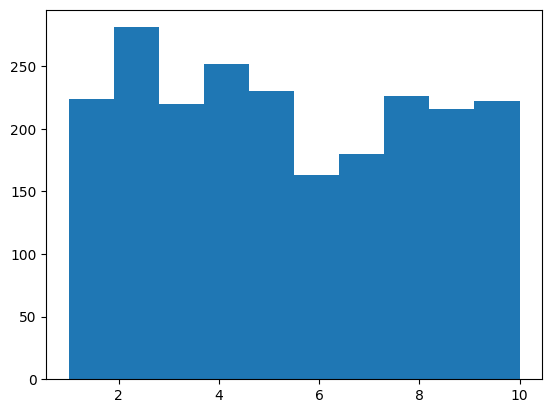

In [17]:
plt.hist(donation_score.total_donation_score, range = (1, 10))

In [18]:
#total_donation max
totaldonation_max = donation_score['total_donation_score'].max()
totaldonation_max

10

In [19]:
#total_donation min
totaldonation_min = donation_score['total_donation_score'].min()
totaldonation_min

0

### Frequency of donations

In [20]:
median = donation_data['Frequency_Donation'].median()
median

1.0

In [21]:
# Frequency of Donations
freqDonation_max = donation_data['Frequency_Donation'].max()
freqDonation_max

98

In [22]:
freqDonation_min = donation_data['Frequency_Donation'].min()
freqDonation_min

1

(array([2.157e+03, 3.900e+01, 8.000e+00, 5.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

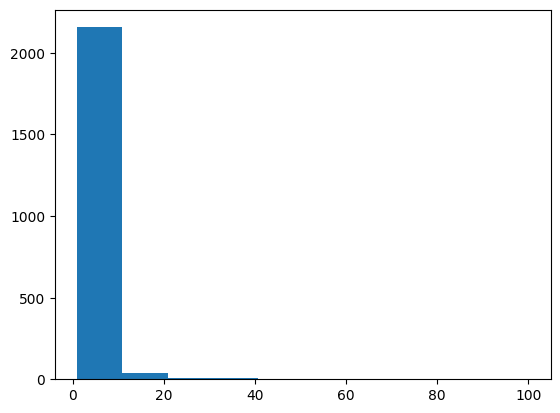

In [23]:
plt.hist(donation_data.Frequency_Donation, range = (1, 100))

In [24]:
# Creating buckets for frequency of donations and assigning score to it
# 0 if x == 0
# 1 if 1<= x <= 3
# 2 if 4 <= x <= 7 
# 3 if 8 <= x <= 12 
# 4 if 12 <= x <= 18 
# 5 if 19 <= x <= 25
# 6 if 26 <= x <= 35
# 7 if 36 <= x <= 45
# 8 if 46 <= x <= 55
# 9 if 56 <= x <= 65
# 10 if x >= 66


donation_score['frequency_donation_score'] =  donation_data['Frequency_Donation'].apply(lambda x: 0 if x == 0 
                                              else (1 if 1<= x <= 3 
                                              else (2 if 4 <= x <= 7 
                                              else (3 if 8 <= x <= 12 
                                              else (4 if 12 <= x <= 18  
                                              else (5 if 19 <= x <= 25
                                              else (6 if 26 <= x <= 35
                                              else (7 if 36 <= x <= 45
                                              else (8 if 46 <= x <= 55
                                              else (9 if 56 <= x <= 65
                                              else 10 ))))))))))

In [25]:
#frequency
frequency_max = donation_score['frequency_donation_score'].max()
frequency_max

10

In [26]:
#frequency
frequency_min = donation_score['frequency_donation_score'].min()
frequency_min

1

### Recency

The number of days since the donor's most recent gift is Recency

In [27]:
recency_split = np.percentile(donation_data[donation_data.Recency > 0]['Recency'], 
                                     [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
recency_split

array([ 107. ,  140. ,  206.6,  227.2,  308. ,  524. ,  574.4,  613. ,
        713. ,  950.6, 1196. ])

In [28]:
recency_split = np.insert(recency_split, 0, -1)
recency_split

array([-1.000e+00,  1.070e+02,  1.400e+02,  2.066e+02,  2.272e+02,
        3.080e+02,  5.240e+02,  5.744e+02,  6.130e+02,  7.130e+02,
        9.506e+02,  1.196e+03])

In [29]:
donation_score['recency_score'] = pd.cut(
    donation_data['Recency'], 
    recency_split, 
    labels = [0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [30]:
donation_score

,Gf_CnBio_ID,special_events_score,total_donation_score,frequency_donation_score,recency_score
0,202130356,0,2,1,4
1,202130376,0,2,1,4
2,201927004,0,5,1,4
3,202029293,10,9,2,5
4,201311492,10,8,1,8
...,...,...,...,...,...
2210,202332234,0,1,1,10
2211,202029527,0,2,1,2
2212,201412271,10,1,1,1
2213,201517696,10,9,1,1


(array([222., 216., 225., 223., 218., 217., 229., 222., 218., 211.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

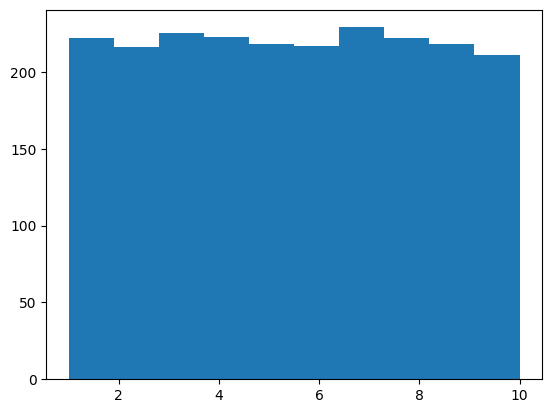

In [31]:
plt.hist(donation_score.recency_score, range = (1, 10))

In [32]:
#Recency
recency_max = donation_score['recency_score'].max()
recency_max

1

In [33]:
#Recency
recency_min = donation_score['recency_score'].min()
recency_min

0

### Donated in the last two years

Donated in the last 2 years score is assigned as, 
* 0 if the person has not donated in the last 2 years
* 10 if the person has donated in the last 2 years

In [34]:
donation_score['donated_last_2_years_score'] = donation_data['Last_2_Years']

### Alter data types

In [35]:
donation_score.dtypes

Gf_CnBio_ID                      int64
special_events_score             int64
total_donation_score          category
frequency_donation_score         int64
recency_score                 category
donated_last_2_years_score      object
dtype: object

In [36]:
# Convert datatypes of all columns to interger datatype
donation_score['total_donation_score'] = donation_score['total_donation_score'].astype(int)
#donation_score['frequency_donation_score'] = donation_score['frequency_donation_score'].astype(int)
donation_score['recency_score'] = donation_score['recency_score'].astype(int)
donation_score['donated_last_2_years_score'] = donation_score['donated_last_2_years_score'].astype(int)


### Donor Score calculation

In [54]:
#The equation for the donation score is,
#Donation Score= 0.2*(Special Events)+ 0.3*(Total Donation)+ 0.2*(Frequency of donations)+ 0.2*(Recency)+ 0.1*(Donated in the last two years) 

donation_score['Donation_Score']= (0.2*(donation_score['special_events_score']))+ (0.3*(donation_score['total_donation_score']))+ (0.2*(donation_score['frequency_donation_score']))+ (0.2*(donation_score['recency_score']))+ (0.1*(donation_score['donated_last_2_years_score']))



In [55]:
donation_score

,Gf_CnBio_ID,special_events_score,total_donation_score,frequency_donation_score,recency_score,donated_last_2_years_score,Donation_Score
0,202130356,0,2,1,4,0,1.6
1,202130376,0,2,1,4,0,1.6
2,201927004,0,5,1,4,0,2.5
3,202029293,10,9,2,5,10,7.1
4,201311492,10,8,1,8,0,6.2
...,...,...,...,...,...,...,...
2210,202332234,0,1,1,10,0,2.5
2211,202029527,0,2,1,2,0,1.2
2212,201412271,10,1,1,1,0,2.7
2213,201517696,10,9,1,1,0,5.1


In [56]:
donationscore_max = donation_score['Donation_Score'].max()
donationscore_max

9.2

In [57]:
donationscore_min = donation_score['Donation_Score'].min()
donationscore_min

0.7

In [80]:
#keeping all donors, joining in the calculated donation score where we have it
full = all_donors.merge(donation_score, how = 'left', left_on = 'CnBio_ID', right_on = 'Gf_CnBio_ID')

#only the two columns we need
full = full[['CnBio_ID', 'Donation_Score']]

#filling in na values with 0 
full['Donation_Score'] = full['Donation_Score'].fillna(0)

full.head()

,CnBio_ID,Donation_Score
0,201925935,0.0
1,201927130,0.0
2,201927129,0.0
3,201721483,0.0
4,201515380,0.0


In [52]:
max(full['Donation_Score'])

8.2

## Volunteering Score Calculation

In [59]:
volunteering_data = pd.read_csv('Volunteer_engagement_data.csv')
volunteering_data

,Constituent_ID,YEAR,Frequency,Total_Hours
0,202231075,2022,63,313
1,202231160,2022,10,279
2,201516049,2022,12,263
3,202130627,2022,5,220
4,201619686,2022,4,220
...,...,...,...,...
474,202332039,2022,1,1
475,202332033,2022,1,1
476,202332016,2022,1,1
477,202332053,2022,1,1


### Frequency of volunteering

In [60]:
median = volunteering_data['Frequency'].median()
median

1.0

In [61]:
# Frequency of Volunteering
freqVolunteering_max = volunteering_data['Frequency'].max()
freqVolunteering_max

63

In [62]:
freqVolunteering_min = volunteering_data['Frequency'].min()
freqVolunteering_min

1

(array([472.,   6.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

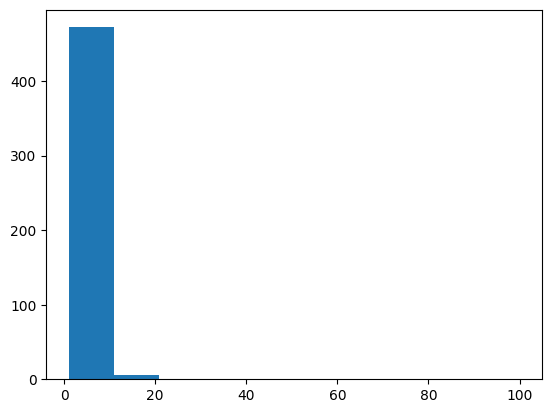

In [63]:
plt.hist(volunteering_data.Frequency, range = (1, 100))

In [64]:
#Create a new dataframe 
volunteering_score = volunteering_data.Constituent_ID.to_frame()

In [65]:
# Creating buckets for frequency of volunteering and assigning score to it
# 0 if x == 0
# 1 if 1<= x <= 3
# 2 if 4 <= x <= 7 
# 3 if 8 <= x <= 12 
# 4 if 12 <= x <= 18 
# 5 if 19 <= x <= 25
# 6 if 26 <= x <= 35
# 7 if 36 <= x <= 45
# 8 if 46 <= x <= 55
# 9 if 56 <= x <= 65
# 10 if x >= 66


volunteering_score['frequency_volunteering_score'] =  volunteering_data['Frequency'].apply(lambda x: 0 if x == 0 
                                              else (1 if 1<= x <= 3 
                                              else (2 if 4 <= x <= 7 
                                              else (3 if 8 <= x <= 12 
                                              else (4 if 12 <= x <= 18  
                                              else (5 if 19 <= x <= 25
                                              else (6 if 26 <= x <= 35
                                              else (7 if 36 <= x <= 45
                                              else (8 if 46 <= x <= 55
                                              else (9 if 56 <= x <= 65
                                              else 10 ))))))))))

In [66]:
volunteering_score

,Constituent_ID,frequency_volunteering_score
0,202231075,9
1,202231160,3
2,201516049,3
3,202130627,2
4,201619686,2
...,...,...
474,202332039,1
475,202332033,1
476,202332016,1
477,202332053,1


### Total hours volunteered

In [67]:
# Max hours volunteered
Total_Hours_max = volunteering_data['Total_Hours'].max()
Total_Hours_max

313

In [68]:
# Min hours volunteered
Total_Hours_min = volunteering_data['Total_Hours'].min()
Total_Hours_min

1

(array([352.,  18.,  23.,   6.,  13.,  45.,   3.,   1.,   2.,   2.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

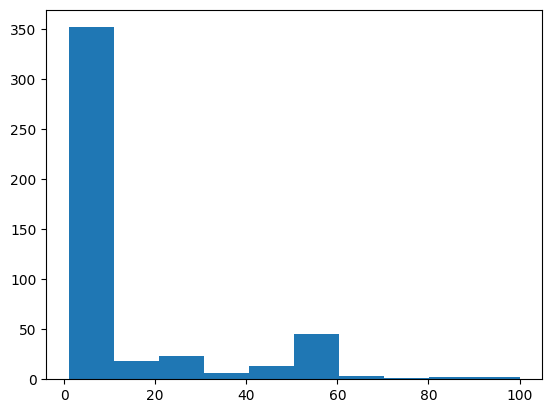

In [69]:
plt.hist(volunteering_data.Total_Hours, range = (1, 100))

In [70]:
total_hours_volunteered_split = np.percentile(volunteering_data[volunteering_data.Total_Hours > 0]['Total_Hours'], 
                                     [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
total_hours_volunteered_split


array([  1.,   1.,   2.,   3.,   5.,   7.,   8.,  10.,  25.,  55., 313.])

In [71]:
total_hours_volunteered_split = np.insert(total_hours_volunteered_split, 0, -1)
total_hours_volunteered_split

array([ -1.,   1.,   1.,   2.,   3.,   5.,   7.,   8.,  10.,  25.,  55.,
       313.])

In [72]:
total_hours_volunteered_split = np.delete(total_hours_volunteered_split, 1)
total_hours_volunteered_split

array([ -1.,   1.,   2.,   3.,   5.,   7.,   8.,  10.,  25.,  55., 313.])

In [73]:
# points for total_hours_volunteered
volunteering_score['total_hours_volunteered_score'] = pd.cut(
    volunteering_data['Total_Hours'], 
    total_hours_volunteered_split, 
    labels = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [74]:
volunteering_score

,Constituent_ID,frequency_volunteering_score,total_hours_volunteered_score
0,202231075,9,10
1,202231160,3,10
2,201516049,3,10
3,202130627,2,10
4,201619686,2,10
...,...,...,...
474,202332039,1,0
475,202332033,1,0
476,202332016,1,0
477,202332053,1,0


In [75]:
volunteering_score.dtypes

Constituent_ID                      int64
frequency_volunteering_score        int64
total_hours_volunteered_score    category
dtype: object

In [76]:
volunteering_score['total_hours_volunteered_score'] = volunteering_score['total_hours_volunteered_score'].astype(int)

In [77]:
#The equation for the volunteering score is,
#Volunteering score = 0.4*(Frequency of volunteering) + 0.6*(Total hours volunteered) 

volunteering_score['Volunteering_Score']= (0.4*(volunteering_score['frequency_volunteering_score']))+ (0.6*(volunteering_score['total_hours_volunteered_score']))

volunteering_score


,Constituent_ID,frequency_volunteering_score,total_hours_volunteered_score,Volunteering_Score
0,202231075,9,10,9.6
1,202231160,3,10,7.2
2,201516049,3,10,7.2
3,202130627,2,10,6.8
4,201619686,2,10,6.8
...,...,...,...,...
474,202332039,1,0,0.4
475,202332033,1,0,0.4
476,202332016,1,0,0.4
477,202332053,1,0,0.4


In [81]:
#adding volunteer score to full df
full = full.merge(volunteering_score, how = 'left', left_on = 'CnBio_ID', right_on = 'Constituent_ID')

#limiting to needed columns
full = full[['CnBio_ID', 'Donation_Score', 'Volunteering_Score']]

#filling in na values with 0 
full['Volunteering_Score'] = full['Volunteering_Score'].fillna(0)

full.head()

,CnBio_ID,Donation_Score,Volunteering_Score
0,201925935,0.0,0.0
1,201927130,0.0,0.0
2,201927129,0.0,0.0
3,201721483,0.0,0.0
4,201515380,0.0,0.0


## Calculating Donor Engagement Score

In [82]:
full['Engagement_Score']= (0.5*(full['Donation_Score']))+ (0.5*(full['Volunteering_Score']))

In [83]:
full.head()

,CnBio_ID,Donation_Score,Volunteering_Score,Engagement_Score
0,201925935,0.0,0.0,0.0
1,201927130,0.0,0.0,0.0
2,201927129,0.0,0.0,0.0
3,201721483,0.0,0.0,0.0
4,201515380,0.0,0.0,0.0


In [87]:
full['Engagement_Score'].max()

7.8999999999999995

In [88]:
full.to_csv('EngagementScoreV2.csv',encoding='utf-8')